In [49]:
import sys
sys.path.append('..')
import os
import torch
from models.cvae import CVAE
import numpy as np
from utils import test_utils as tut
from utils import prob_utils as put
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Model

In [40]:
z = 1
run = 0

In [41]:
layout = [
    ('model={:s}', 'cvae'),
    ('z={:02d}', z),
    ('run={:04d}', run)
]

model_name = '_'.join([t.format(v) for (t, v) in layout])

In [42]:
cvae = CVAE(z_dim=z, name=os.path.join(model_name))
tut.load_model_by_name(cvae, global_step=20000)

loaded from checkpoints/model=cvae_z=01_run=0000/model-20000.pt


# Get test loader

In [43]:
train_loader, valid_loader = put.get_data_loaders()

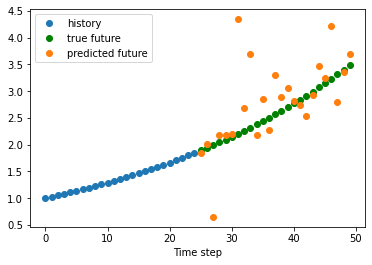

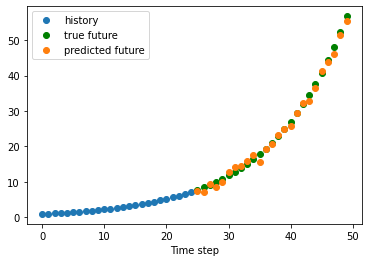

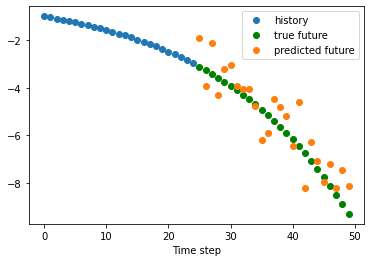

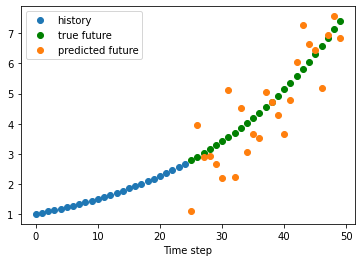

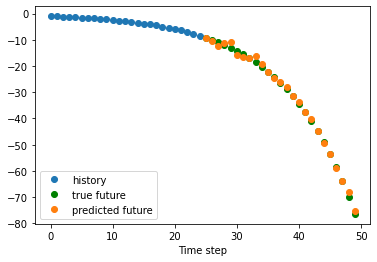

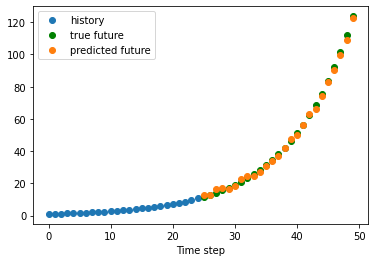

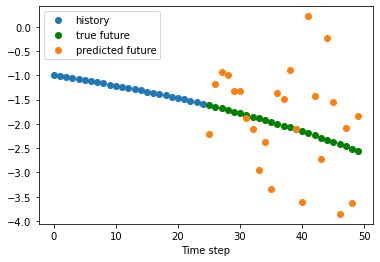

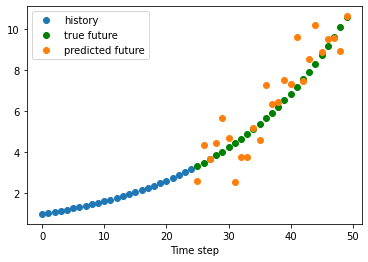

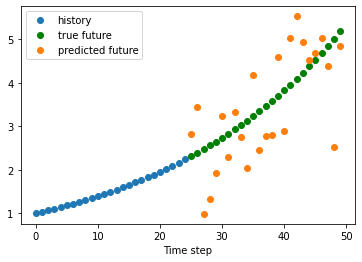

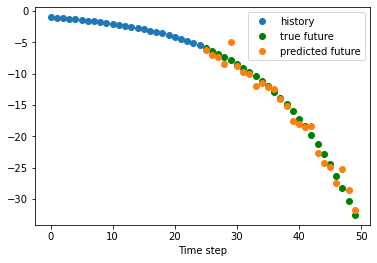

In [59]:
for i, (x, y) in enumerate(valid_loader):
    batch = len(x)
    z = cvae.sample_z(1) 
    y_pred = cvae.sample_y_given(x, z)
    
    x = x[0]
    y = y[0]
    y_pred = y_pred[0]
    x_hist = range(0, len(x))
    x_pred = range(len(x), len(x) + len(y))
    
    plt.figure()
    plt.plot(x_hist, x, 'o', label='history')
    plt.plot(x_pred, y, 'o', color='green', label='true future')
    plt.plot(x_pred, y_pred, 'o', label='predicted future')
    plt.xlabel('Time step')
    plt.legend()
    